# Graphs

## Graph representation with adjacency matrix
Matrix representation of Graph
### Arguments:
- `vertices` (int): Number of total vertices in the graph
- `is_directed` (Bool): Expects directed or not directed graph. Defaults to not directed graph.

### Space Complexity:
Space complexity for graphs represented with adjacenecy matrix is $O(V^2)$ where $V$ is number of vertices. Use this method of representation only when your graph is dense. Number of edges $|E| ≥ V^2$ Else a lot of zeros will be placed inside the matrix which won't be that efficient space wise. For sparse matrix use `GraphDictionaryRepresented` instead of `GraphMatrixRepresented`.

In [1]:
from AKDSFramework.structure.graph import GraphMatrixRepresented
import numpy as np

graph1 = GraphMatrixRepresented(vertices=10, is_directed=True)

In [2]:
# Now add few edges with random weights
while graph1.number_of_edges < 100:
    random_start = np.random.randint(low=0, high=graph1.vertices)
    random_end = np.random.randint(low=0, high=graph1.vertices)
    random_weight = np.random.randint(-7, 20)
    if random_weight != 0 and graph1.show_graph()[random_start][random_end] == 0:
        graph1.add_edge_between(start=random_start, end=random_end, weight=random_weight)
        graph1.add_edge_between(start=random_start, end=random_end, weight=random_weight)
    else:
        pass

Now showing edges and vertices and the matrix representation of the graph

In [3]:
print(f"Total number of edges: {graph1.number_of_edges}")  # or print(graph1.count_edges())
print(f"Total vertices: {graph1.vertices}")
print(graph1.show_graph())

Total number of edges: 100
Total vertices: 10
[[ 8 -3  8 13  1  7  2 18  7  6]
 [ 6 -1 -5  4 14  8 -2 17 -3 -2]
 [-7 10  2 14 10 -2  6  7  7 -4]
 [ 9 15 13 16 -3  1 12  8  1 12]
 [-1  4 11 -7 18 12  8  8 18 16]
 [16  8 11 -4  2 16 15 -5 -4  8]
 [16 -6  3  3 15  2  5 12 11 15]
 [ 3 15 14 -3  8  6 15  2 -2 14]
 [ 7 11  6 -2 10  5 16 -2 -1  3]
 [13  7  4  2 15  6  1 -5 17 14]]


## Graph representation with adjacency lists
If you have a sparse graph use `GraphDictionaryRepresented()` for representing graphs. This takes $O(E + V)$ space.
Running BFS DFS will be faster in this structure for sparse represented graphs, that's why we implemented BFS DFS as a method in GraphDictionaryRepresented class.

## Let's create a graph

Let's create a graph. To create graphs we need to create Vertex objects. We've made custom vertex objects because we need to store the neighbours and keep track of those guys.

In [4]:
from AKDSFramework.structure.graph import Vertex
from AKDSFramework.structure.graph import GraphDictionaryRepresented

In [5]:
g = GraphDictionaryRepresented()

Now let's register few vertices:

In [6]:
for i in range(1, 8):
    g.register_vertex(Vertex(f'{i}'))

print(f"Now we have {g.number_of_vertices} number of vertices")

Now we have 7 number of vertices


Using raw_dict you can see all the vertices and their neighbors

In [7]:
print("Here is the dictionary containing all the vertices and it's neighbor")
g.raw_dict()

Here is the dictionary containing all the vertices and it's neighbor


{'1': <AKDSFramework.structure.graph.Vertex> object 1 with neighbors: [],
 '2': <AKDSFramework.structure.graph.Vertex> object 2 with neighbors: [],
 '3': <AKDSFramework.structure.graph.Vertex> object 3 with neighbors: [],
 '4': <AKDSFramework.structure.graph.Vertex> object 4 with neighbors: [],
 '5': <AKDSFramework.structure.graph.Vertex> object 5 with neighbors: [],
 '6': <AKDSFramework.structure.graph.Vertex> object 6 with neighbors: [],
 '7': <AKDSFramework.structure.graph.Vertex> object 7 with neighbors: []}

As we've not registerd neighbor's and edges with the vertex all the neighbors are showing blank. Let's now add a few edges.

In [8]:
edges = ['15', '14', '12', '27', '26', '23']
for edge in edges:
    g.register_edge(edge[:1], edge[1:], directed=False)

Now let's have a look at the graph

In [9]:
g.prettyprint()

1 -> [('2', 1), ('4', 1), ('5', 1)]
2 -> [('1', 1), ('3', 1), ('6', 1), ('7', 1)]
3 -> [('2', 1)]
4 -> [('1', 1)]
5 -> [('1', 1)]
6 -> [('2', 1)]
7 -> [('2', 1)]


And the dictionary would look like

In [10]:
g.raw_dict()

{'1': <AKDSFramework.structure.graph.Vertex> object 1 with neighbors: [('2', 1), ('4', 1), ('5', 1)],
 '2': <AKDSFramework.structure.graph.Vertex> object 2 with neighbors: [('1', 1), ('3', 1), ('6', 1), ('7', 1)],
 '3': <AKDSFramework.structure.graph.Vertex> object 3 with neighbors: [('2', 1)],
 '4': <AKDSFramework.structure.graph.Vertex> object 4 with neighbors: [('1', 1)],
 '5': <AKDSFramework.structure.graph.Vertex> object 5 with neighbors: [('1', 1)],
 '6': <AKDSFramework.structure.graph.Vertex> object 6 with neighbors: [('2', 1)],
 '7': <AKDSFramework.structure.graph.Vertex> object 7 with neighbors: [('2', 1)]}

That's our graph.
## BFS & DFS
Let's run BFS and DFS algo on top of the graph to see results. We'll start from vertex number '1'

In [11]:
print(g.BFS('1'))
print(g.DFS('1'))

['1', '2', '4', '5', '3', '6', '7']
['1', '2', '3', '6', '7', '4', '5']


## Visualize the graph
You can also see how your graph looks. Either in a TD (Top down approach) or a LR(Left right view).

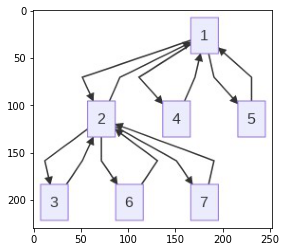

In [12]:
from AKDSFramework.structure.graph import draw_graph
draw_graph(g, "TD")

Left to right view of the same graph.

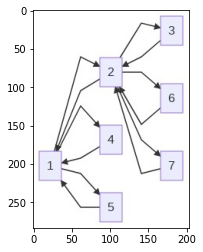

In [13]:
draw_graph(g, "LR")